In [1]:
import pandas as pd
from google.colab import files
data_to_load = files.upload()

Saving arithmetic_test.csv to arithmetic_test.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


arithmetic_test = pd.read_csv('arithmetic_test', delimiter=';')

print(arithmetic_test.head())
print(arithmetic_test.columns)

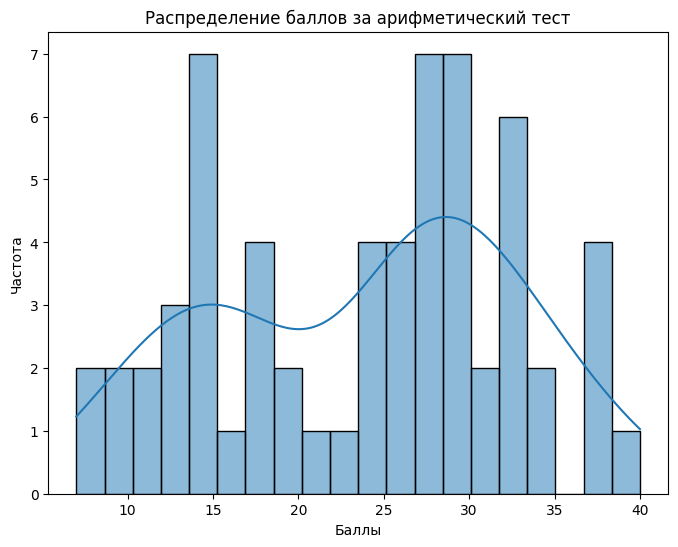

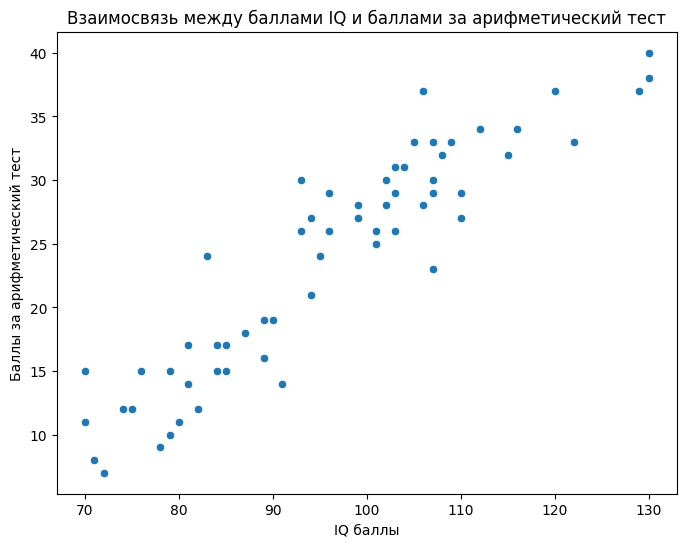

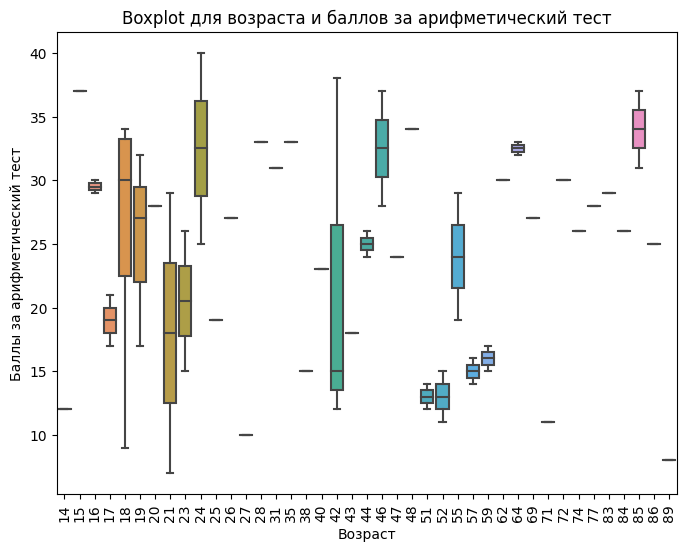

In [ ]:
# 1)Постройте как минимум 3 графика, описывающих данные. Какие предварительные выводы вы можете сделать по этим графикам?
import matplotlib.pyplot as plt
import seaborn as sns

#График 1 показывает, что баллы за арифметический тест имеют нормальное распределение.
plt.figure(figsize=(8, 6))
sns.histplot(data=arithmetic_test, x='mental_arithm', bins=20, kde=True)
plt.title('Распределение баллов за арифметический тест')
plt.xlabel('Баллы')
plt.ylabel('Частота')
plt.show()

#График 2 показывает, что существует положительная корреляция между баллами IQ и баллами за арифметический тест.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=arithmetic_test, x='iq', y='mental_arithm')
plt.title('Взаимосвязь между баллами IQ и баллами за арифметический тест')
plt.xlabel('IQ баллы')
plt.ylabel('Баллы за арифметический тест')
plt.show()

#График 3 позволяет увидеть, как возраст влияет на баллы за арифметический тест, и показывает, что с возрастом баллы могут меняться.
plt.figure(figsize=(8, 6))
sns.boxplot(data=arithmetic_test, x='age', y='mental_arithm')
plt.title('Boxplot для возраста и баллов за арифметический тест')
plt.xlabel('Возраст')
plt.ylabel('Баллы за арифметический тест')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# 2.A) база данных без аномалий. нет значений, которые бы считались выбросами
#B) Заполнение отсутствующих значений переменных mental_arithm, age, att_test_missed, iq

import pandas as pd

arithmetic_test.dropna(subset=['mental_arithm'], inplace=True)
arithmetic_test['age'].fillna(arithmetic_test['age'].mean(), inplace=True)
arithmetic_test['att_test_missed'].fillna(arithmetic_test['att_test_missed'].mean(), inplace=True)
arithmetic_test['iq'].fillna(arithmetic_test['iq'].mean(), inplace=True)

print(arithmetic_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             62 non-null     object 
 1   Last name        62 non-null     object 
 2   age              62 non-null     int64  
 3   male             62 non-null     int64  
 4   att_test_missed  62 non-null     int64  
 5   mental_arithm    62 non-null     int64  
 6   iq               62 non-null     int64  
 7   degree           62 non-null     int64  
 8   student          62 non-null     int64  
 9   fav_sub          62 non-null     object 
 10  predisposition   62 non-null     int64  
 11  practiced        62 non-null     int64  
 12  Unnamed: 12      0 non-null      float64
dtypes: float64(1), int64(9), object(3)
memory usage: 6.4+ KB
None


In [ ]:
#3) Постройте модель линейной регрессии. Рассчитайте MSE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = arithmetic_test[['age', 'male', 'att_test_missed', 'iq', 'degree', 'student', 'predisposition', 'practiced ']]
y = arithmetic_test['mental_arithm']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 9.895955901916874



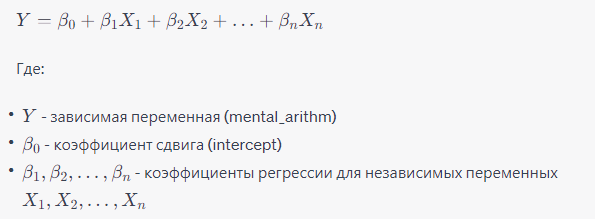

In [ ]:
#Выведите summary модели.
import statsmodels.api as sm


X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          mental_arithm   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     34.51
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           1.34e-15
Time:                        18:11:22   Log-Likelihood:                -124.36
No. Observations:                  49   AIC:                             266.7
Df Residuals:                      40   BIC:                             283.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -20.7642      5.648     

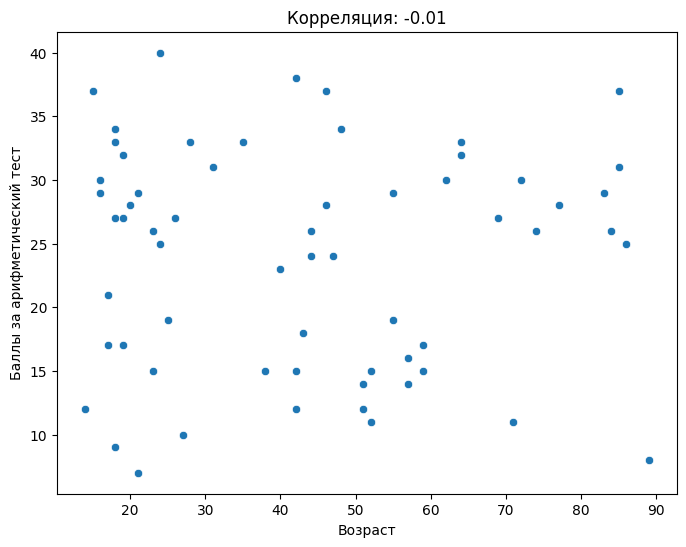

In [ ]:
# 6) Проверьте три допущения линейной регрессии и сделайте на их основе выводы
# a.Линейная зависимость

correlation = np.corrcoef(arithmetic_test['mental_arithm'], arithmetic_test['age'])[0, 1] #Эта функция вычисляет коэффициент корреляции Пирсона между двумя переменными.


plt.figure(figsize=(8, 6))
sns.scatterplot(data=arithmetic_test, x='age', y='mental_arithm') # график рассеяния. Построение точечного графика, где ось X представляет 'age', а ось Y - 'mental_arithm'
plt.title(f'Корреляция: {correlation:.2f}')
plt.xlabel('Возраст')
plt.ylabel('Баллы за тест')
plt.show()
#не имеют сильной линейной зависимости друг от друга. Корреляционный коэффициент близок к нулю (-0.02). График  также подтверждает отсутствие явной линейной зависимости, так как точки данных равномерно разбросаны вокруг горизонтальной оси.

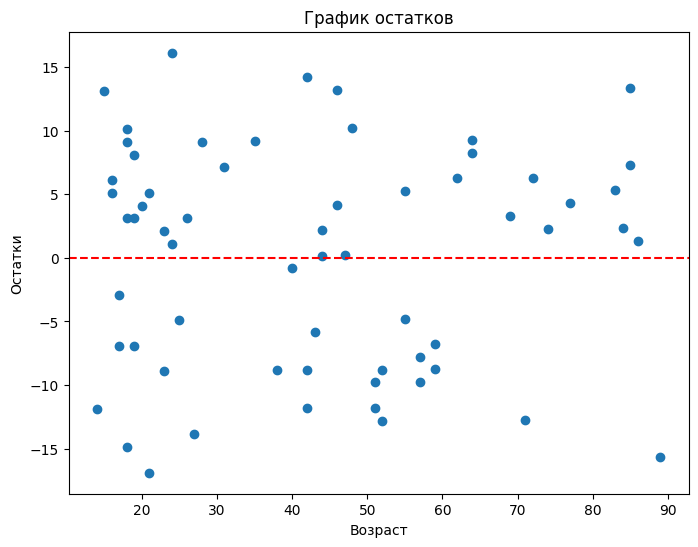

In [ ]:
# 6) b.Постоянная дисперсия


X = arithmetic_test['age']  # Независимая переменная (возраст)
y = arithmetic_test['mental_arithm']  # Зависимая переменная (баллы за тест)

X = sm.add_constant(X)  # константa модели

model = sm.OLS(y, X).fit()

#остатки модели
residuals = model.resid


plt.figure(figsize=(8, 6))
plt.scatter(arithmetic_test['age'], residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График остатков')
plt.xlabel('Возраст')
plt.ylabel('Остатки')
plt.show()

#Остатки распределены вокруг нулевой горизонтальной линии.модель хорошо предсказывает зависимую переменную.
#график остатков визуально подтверждает адекватность модели и отсутствие явных систематических ошибок в предсказаниях.

In [ ]:
# 7)
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


X = arithmetic_test[['age', 'att_test_missed', 'iq']]
y = arithmetic_test['mental_arithm']

# модель линейной регрессии
model = LinearRegression()

# Пкросс-валидация с использованием 5 фолдов
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Преобразование отрицательные MSE в положительные значения и вычисление среднего
mse_scores = -scores
mean_mse = np.mean(mse_scores)

print("MSE для каждого фолда:", mse_scores)
print("Средний MSE:", mean_mse)


MSE для каждого фолда: [ 7.86656349 10.71751914 17.00855387 17.15130855  4.47150581]
Средний MSE: 11.443090170634765
